# Windowing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

Wir verwenden Anselms Code aus der Übung, um ein Signal mit einer ADSR-Envelope zu generieren.

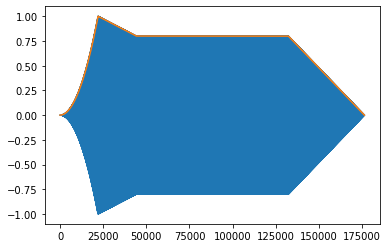

In [2]:
length_scale = 1
sample_rate = 44100
length = 4 * length_scale
freq = 440


t = np.linspace(0, 1 * np.pi * 2 * freq * length, sample_rate * length)
sinus = np.sin(t)

def generate_adsr(attack = 0.5, decay = 0.5, sustain = 2, release = 1, sample_rate = 44100, scale = 1):
    
    a = np.linspace(0, 1, int(sample_rate * attack * scale ))**2
    d = np.linspace(1, 0.8, int(sample_rate * decay * scale))
    s = np.ones(int(sample_rate * sustain * scale)) - 0.2
    r = np.linspace(0.8, 0, int(sample_rate * release * scale))
    return np.concatenate((a, d, s, r)) 
 
    
env = generate_adsr(scale = length_scale)

sinus_env = sinus * env


plt.plot(sinus_env)
plt.plot(env)

display(Audio(sinus_env, rate = sample_rate))

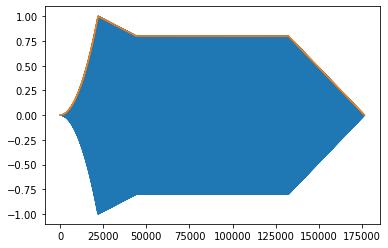

In [4]:
hop_length = 50 # in samples
window_length = 100 # auch in samples

num_windows = (np.size(sinus_env) - window_length) // hop_length
# alternative size berechnung: length * sr

amp_env = np.array([])

for i in range(num_windows):
    
    start_i = i * hop_length
    stop_i = start_i + window_length
    
    window = sinus_env[start_i:stop_i]
    
    env_val = np.max(window)
    
    amp_env = np.append(amp_env, env_val)

plt.plot(sinus_env)
plt.plot(np.linspace(0, np.size(sinus_env), np.size(amp_env)), amp_env)

In [5]:
# alles in eine Funktion packen:

def analyze_amp_env(sig, hop_length=50, window_length=100):
    # hop_length = 50 # in samples
    # window_length = 100 # auch in samples

    num_windows = (np.size(sig) - window_length) // hop_length
    # alternative size berechnung: length * sr

    amp_env = np.array([])

    for i in range(num_windows):

        start_i = i * hop_length
        stop_i = start_i + window_length

        window = sig[start_i:stop_i]

        env_val = np.max(window)

        amp_env = np.append(amp_env, env_val)
        
    return amp_env

50 100 3526


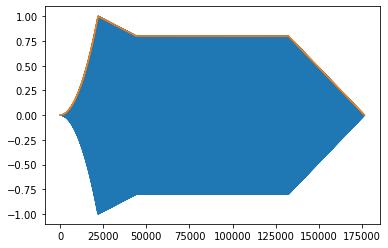

50 500 3518


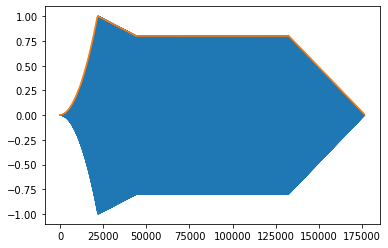

50 2000 3488


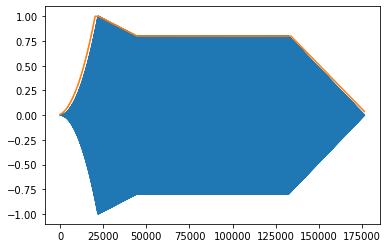

50 4000 3448


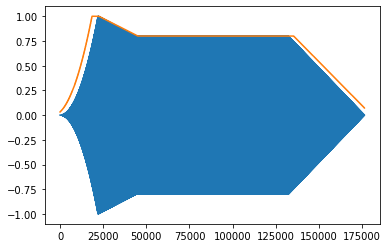

100 100 1763


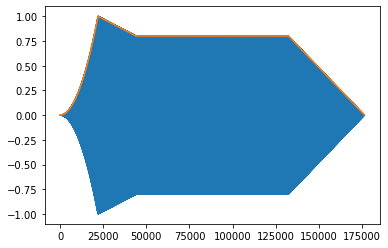

100 500 1759


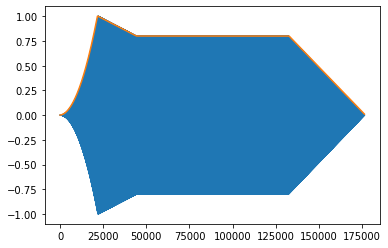

100 2000 1744


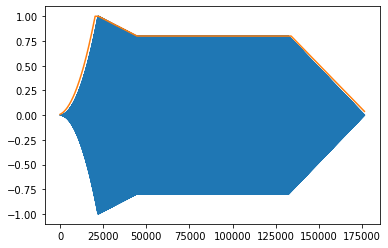

100 4000 1724


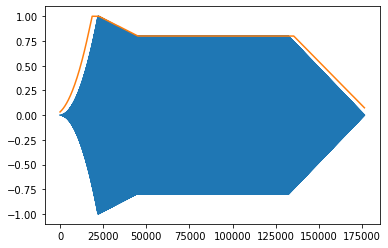

500 100 352


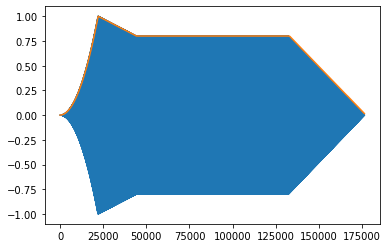

500 500 351


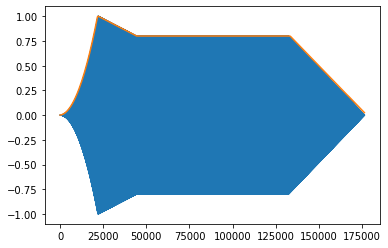

500 2000 348


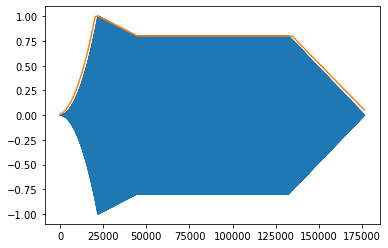

500 4000 344


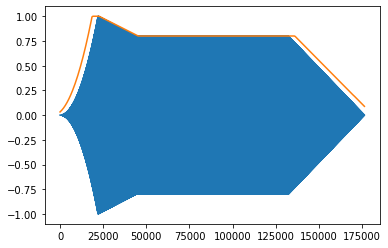

2000 100 88


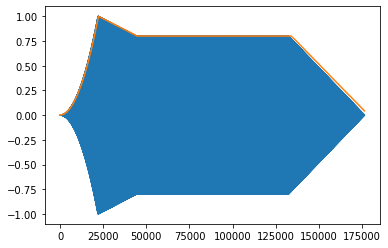

2000 500 87


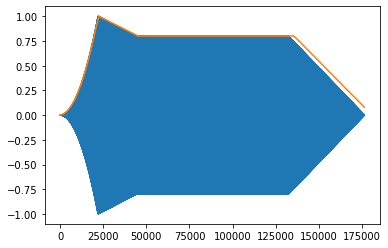

2000 2000 87


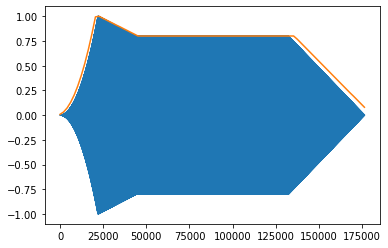

2000 4000 86


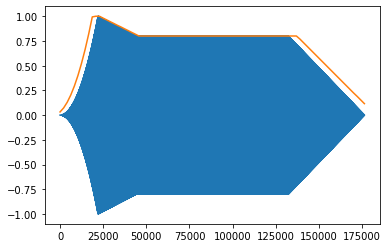

In [6]:
hop_lengths = [50, 100, 500, 2000]
window_lengths = [100, 500, 2000, 4000]

for hop_length in hop_lengths:

    for window_length in window_lengths:

        amp_env = analyze_amp_env(sinus_env, hop_length=hop_length, window_length=window_length)
        
        print(hop_length, window_length)
        
        plt.figure()
        plt.plot(sinus_env)
        plt.plot(np.linspace(0, np.size(sinus_env), np.size(amp_env)), amp_env)
        plt.show()